In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [23]:
german_Bank = pd.read_table("german.data",sep=" ")

C:\Users\iheb_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [16]:
# Pour la banque de Taiwan il y a pas de données manquantes Donc on va faire directement l'encodage (One Hot Encoder)
german_Bank_1=german_Bank
# one hot encoding
df1 = pd.get_dummies(german_Bank_1.Status)
df1.rename(columns = {'A11':'Status_A11','A12':'Status_A12','A13':'Status_A13','A14':'Status_A14'}, inplace = True)
df2 = pd.get_dummies(german_Bank_1.credit_history)
df2.rename(columns = {'A30':'CredHist_A30','A31':'CredHist_A31','A32':'CredHist_A32','A33':'CredHist_A33','A34':'CredHist_A34'}, inplace = True)
df3 = pd.get_dummies(german_Bank_1.Purpose)
df3.rename(columns = {'A40':'Purpose_A40','A41':'Purpose_A41','A42':'Purpose_A42','A43':'Purpose_A43','A44':'Purpose_A44','A45':'Purpose_A45','A46':'Purpose_A46','A47':'Purpose_A47','A48':'Purpose_A48','A49':'Purpose_A49','A410':'Purpose_A410'}, inplace = True)
df4 = pd.get_dummies(german_Bank_1.Saving_amount)
df4.rename(columns = {'A61':'SaveAccount_A61','A62':'SaveAccount_A62','A63':'SaveAccount_A63','A64':'SaveAccount_A64','A65':'SaveAccount_A65'}, inplace = True)
df5 = pd.get_dummies(german_Bank_1.YOJ)
df5.rename(columns = {'A71':'YOJ_A71','A72':'YOJ_A72','A73':'YOJ_A73','A74':'YOJ_A74','A75':'YOJ_A75'}, inplace = True)
df6 = pd.get_dummies(german_Bank_1.Status_SEX)
df6.rename(columns = {'A91':'Status&Sex_A91','A92':'Status&Sex_A92','A93':'Status&Sex_A93','A94':'Status&Sex_A94','A95':'Status&Sex_A95'}, inplace = True)
df7 = pd.get_dummies(german_Bank_1.debtors_guarantors)
df7.rename(columns = {'A101':'DebGuarant_A101','A102':'DebGuarant_A102','A103':'DebGuarant_A103'}, inplace = True)
df9 = pd.get_dummies(german_Bank_1.Property)
df9.rename(columns = {'A121':'Property_A121','A122':'Property_A122','A123':'Property_A123','A124':'Property_A124'}, inplace = True)
df10 = pd.get_dummies(german_Bank_1.installment_plans)
df10.rename(columns = {'A141':'InstallPlan_A141','A142':'InstallPlan_A142','A143':'InstallPlan_A143'}, inplace = True)
df11 = pd.get_dummies(german_Bank_1.Housing)
df11.rename(columns = {'A151':'Housing_A151','A152':'Housing_A152','A153':'Housing_A153'}, inplace = True)
df12 = pd.get_dummies(german_Bank_1.Job)
df12.rename(columns = {'A171':'Job_A171','A172':'Job_A172','A173':'Job_A173','A174':'Job_A174'}, inplace = True)
df13 = pd.get_dummies(german_Bank_1.Telephone)
df13.rename(columns = {'A191':'Tel_None','A192':'Tel_Registred'}, inplace = True)
df14 = pd.get_dummies(german_Bank_1.Foreign_warker)
df14.rename(columns = {'A201':'ForeignWorker_Yes','A202':'ForeignWorker_No'}, inplace = True)

german_Bank_1 = pd.concat([german_Bank_1,df1,df2,df3,df4,df5,df6,df7,df9,df10,df11,df12,df13,df14], axis = 1)
german_Bank_1.drop(labels=['Status','credit_history','Purpose','Saving_amount','YOJ','Status_SEX','debtors_guarantors','Property','installment_plans','Housing','Job','Telephone','Foreign_warker'], axis =1, inplace = True)

# Mettre la column cible dans un vecteur à part et la supprimer de la dataframe
cible_german=german_Bank_1["Cost"]
german_Bank_Final=german_Bank_1.drop(labels=['Cost'], axis =1)

# DataFrame surlaquelle on va appliquer nos algorithmes:
german_Bank_Final.head(1)


,Duration,Credit_amount,Installment_rate,Residence,Age,Nb_credit,persons_liable,Status_A11,Status_A12,Status_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_None,Tel_Registred,ForeignWorker_Yes,ForeignWorker_No
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0


In [61]:

german_Bank["Cost"].unique()

array([1, 2], dtype=int64)

In [38]:
german_Bank.head(1)

,Status,Duration,credit_history,Purpose,Credit_amount,Saving_amount,YOJ,Installment_rate,Status_SEX,debtors_guarantors,...,Property,Age,installment_plans,Housing,Nb_credit,Job,persons_liable,Telephone,Foreign_warker,Cost
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1


In [49]:
german_Bank.columns

Index(['Status', 'Duration', 'credit_history', 'Purpose', 'Credit_amount',
       'Saving_amount', 'YOJ', 'Installment_rate', 'Status_SEX',
       'debtors_guarantors', 'Residence', 'Property', 'Age',
       'installment_plans', 'Housing', 'Nb_credit', 'Job', 'persons_liable',
       'Telephone', 'Foreign_warker', 'Cost'],
      dtype='object')

In [4]:
dataCible=cible_german
dataSansCible=german_Bank_Final


# Kmeans

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

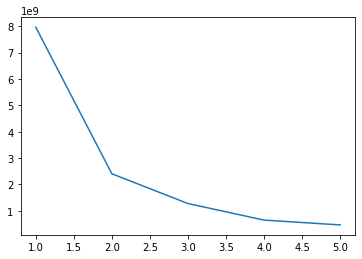

In [6]:
# Déterminer le nombre de cluster (L-Bow)
L = []
for i in range(1,6):
    model = KMeans(n_clusters=i)
    model.fit(dataSansCible)
    L.append(model.inertia_)
plt.plot(range(1,6),L)

In [7]:
# Nombre de cluster = 2 
kmeans = KMeans(n_clusters=2, precompute_distances='auto')
kmeans.fit(dataSansCible)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
y_kmeans = kmeans.fit_predict(dataSansCible)


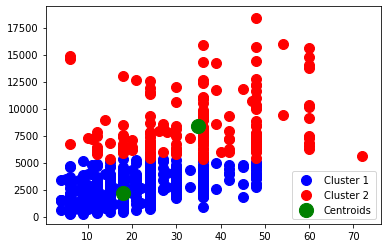

In [9]:
plt.scatter(dataSansCible.values[y_kmeans == 0, 0], dataSansCible.values[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(dataSansCible.values[y_kmeans == 1, 0], dataSansCible.values[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

In [10]:
idk = np.argsort(kmeans.labels_)
pd.crosstab(dataCible,kmeans.labels_)


col_0,0,1
Cost,,
1,599,101
2,228,72


# CAH

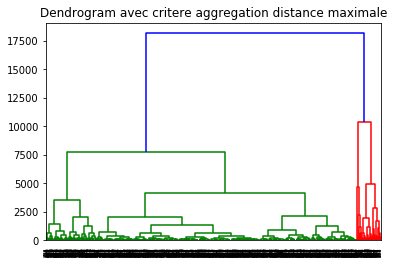

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
matrice1=linkage(dataSansCible, 'complete')
dendrogram(matrice1)
plt.title('Dendrogram avec critere aggregation distance maximale')
plt.show()


In [12]:
groupes_cah = fcluster(matrice1,t=12500,criterion='distance') 
idg = np.argsort(groupes_cah)
# CrossTable
pd.crosstab(dataCible,groupes_cah)

col_0,1,2
Cost,,
1,668,32
2,262,38


# KNN

In [13]:
print(german_Bank.groupby('Cost').size())

Cost
1    700
2    300
dtype: int64


In [7]:
X = dataSansCible
y= pd.factorize(dataCible)[0]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

Text(0, 0.5, 'Erreur')

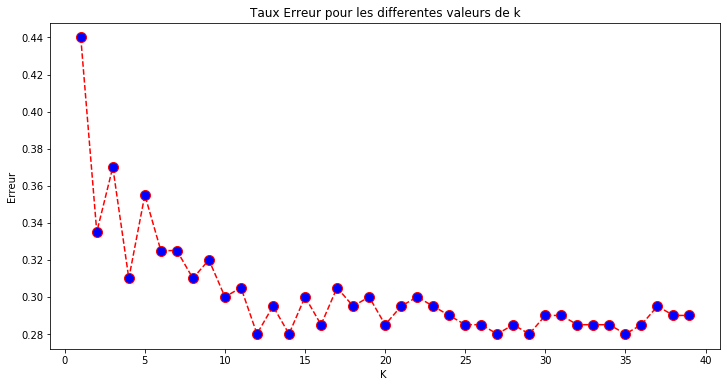

In [16]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [17]:
knn = KNeighborsClassifier(12)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [18]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.72


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [20]:
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.72

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn)) 

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       142
           1       0.57      0.14      0.22        58

    accuracy                           0.72       200
   macro avg       0.65      0.55      0.53       200
weighted avg       0.68      0.72      0.65       200



# CART

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.65


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))


              precision    recall  f1-score   support

           0       0.76      0.75      0.75       142
           1       0.40      0.41      0.41        58

    accuracy                           0.65       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.65      0.65      0.65       200



# Perceptron

In [24]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predictions0 = perceptron.predict(X_test)
acc_perceptron = accuracy_score(y_test, predictions0)
acc_perceptron

0.71

# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
nb_model=gaussian.fit(X_train, y_train)
predictions_B = nb_model.predict(X_test)
#acc_gaussian = accuracy_score(y_test, predictions_B)
#acc_gaussian

In [11]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(nb_model, 'german_nb_model.pkl')

C:\Users\iheb_\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['german_nb_model.pkl']

# Déscente du gradient

In [26]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predictionss = sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, predictionss)
acc_sgd

0.31

# SVM

In [34]:
from sklearn.svm import SVC, LinearSVC
svc1 = SVC(kernel="linear")
svc1_model=svc1.fit(X_train, y_train)
y_pred_svc1 = svc1_model.predict(X_test)


In [35]:
acc_svc = accuracy_score(y_test, y_pred_svc1)
acc_svc


0.75

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)
print(random_forest.score(X_train, y_train))
acc_random_forest = accuracy_score(y_test, predictions_rf)
acc_random_forest

1.0


0.73

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       142
           1       0.55      0.40      0.46        58

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.73      0.72       200



# Tableau Comparatif

In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd]})
models.sort_values(by="Score",ascending=False)

,Model,Score
0,Support Vector Machines,0.75
2,Random Forest,0.73
1,KNN,0.72
3,Naive Bayes,0.71
4,Perceptron,0.71
5,Stochastic Gradient Decent,0.31


# ROC

In [37]:
from sklearn.metrics import roc_curve, auc

In [38]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, predictions_rf) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, predictions_B) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, predictionss) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, predictions0)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_dtc)
roc_auc7 = auc(fpr7, tpr7)

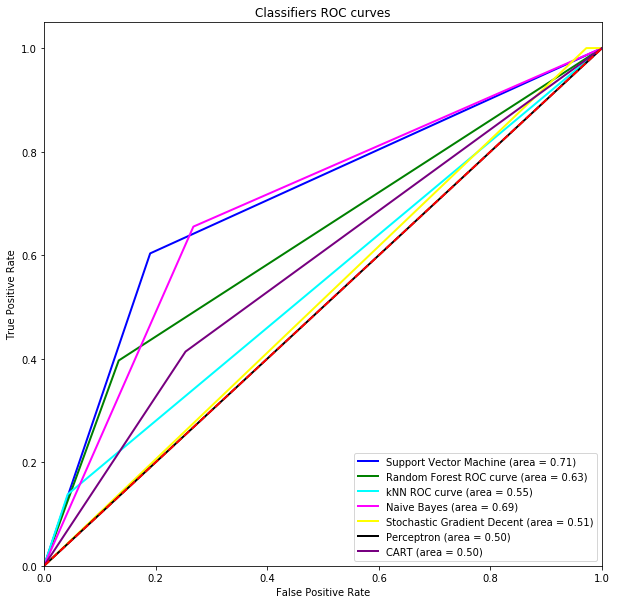

In [39]:
plt.figure(figsize=(10,10)) 
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Support Vector Machine (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Naive Bayes (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='yellow', lw=2, label='Stochastic Gradient Decent (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='Perceptron (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='#770080', lw=2, label='CART (area = %0.2f)'% roc_auc6)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()